# $$\textbf{Python Programming for Machine Learning} $$ 

#### $$\text{WiSe 2020/2021}$$

## $$\text{Lecture 2: Inheritance, Numpy, Performance, Plotting} $$

#### $$\text{Sergej Dogadov} \quad \text{Philine Thalia Görzig} \quad \text{Panagiotis Tomer Karagiannis}$$

<center>
<img src='images/pyt.png' width=450>

## $$\textbf{Python class inheritance}$$
<hr>

* $\textbf{Inheritance} \text{ is when a class uses code constructed within another class.}$

In [3]:
class Person: # Parent class
    
    def __init__(self, first_name, last_name): # constructor
        
        self.first_name = first_name
        self.last_name = last_name
        
    def __repr__(self): # object representation
        return f'Person: {self.first_name} {self.last_name}'
    
    def __call__(self):
        return self.talk()
    
    def talk(self): # method
        return f'My name is {self.first_name} {self.last_name}. '
    
me = Person('Sergej', 'Dogadov')

# representation is used
print(me) 

me() # or me.talk() explicit call

Person: Sergej Dogadov


'My name is Sergej Dogadov. '

### $$\textbf{Child class}$$
<hr>

In [4]:
class Student(Person): # Child class
    
    def __init__(self, first_name, last_name, mat_number, university):
        
        Person.__init__(self, first_name, last_name) # Parent constructor
        
        self.mat_number = mat_number
        self.university = university
        
        self.classes = []
        self.credits = 0 # ECTS
        
    def __repr__(self):
        info = f'{self.first_name} {self.last_name}\nStudent at {self.university} {self.mat_number}'
        
        if len(self.classes) > 0:      
            classes = ', '.join(self.classes)
            info += f'\nCredits: {self.credits} ECTS in {classes}'
            
        return  info
        
    def talk(self):
        # parent's method call
        return super().talk() + f"I study at {self.university}. " + \
            f"My matriculation number is {self.mat_number}"
    
    def exam(self, class_name, credit):
        self.classes += [class_name]
        self.credits += credit
        
me() # function talk is invoked

'My name is Sergej Dogadov. '

In [5]:
me = Student('Sergej', 'Dogadov', 123456, 'TU Berlin')
#print(me)

#me()
me.exam('CA', 6)
me.exam('ML-1X', 12)

print(me)

Sergej Dogadov
Student at TU Berlin 123456
Credits: 18 ECTS in CA, ML-1X


## $$\textbf{Multiple class inheritance}$$
<hr>

In [6]:
class Employe:
    
    def __init__(self, company, position, salary):
        
        self.company = company
        self.position = position
        self.salary = salary
        
    def __repr__(self):
        return f"Employe at {self.company} as {self.position}"

In [7]:
class HiWi(Student, Employe):
    
    def __init__(self, first_name, last_name, mat_number, university, salary):
        
        Student.__init__(self, first_name, last_name, mat_number, university)
        Employe.__init__(self, university, 'HiWi', salary)
        
    def __repr__(self):
        
        info = super().__repr__() # first inherited class is beeing called 
        info += f'\nPosition: {self.position} with salary {self.salary}$'
        return info

In [8]:
me = HiWi('Sergej','Dogadov', 123456, 'TU Berlin', 1000)
me.exam('T1', 6)
me

Sergej Dogadov
Student at TU Berlin 123456
Credits: 6 ECTS in T1
Position: HiWi with salary 1000$

# $$\textbf{Package for scientific computing}$$
<hr>
<br>
<center>
<img src='images/num.png' width=850>
</center>    


### $\textbf{Usefull options:}$

* $\text{a powerful }N\text{-dimensional array object}$
* $\text{sophisticated (broadcasting) functions}$
* $\text{linear algebra, Fourier transform, and random number capabilities.}$

* $\text{Import the package in order to use the built-in functionality} $


In [12]:
# conda install -c anaconda numpy

import numpy as np # as alias or better to say a shortcut 

## $$\textbf{NumPy arrays and data types}$$
<hr>

* $\text{Create a powerful }$N-$\text{dimensional } $NumPy$ \text{ array object}$

In [14]:
X = np.array([1, 2, 3, 4]) # from list

print(X,type(X)) 

print(50*'--')

Y = np.array((1, 2.0, 3, 4))# from tuple
print(Y, type(Y))
Y[-1] = 1
Y

[1 2 3 4] <class 'numpy.ndarray'>
----------------------------------------------------------------------------------------------------
[1. 2. 3. 4.] <class 'numpy.ndarray'>


array([1., 2., 3., 1.])

* $\text{Data type inside the object is estimated from the inputs}$

In [16]:
X = np.array(range(2,10,2)) # from range generator

print(X, X.dtype) # double precision integer
print(Y, Y.dtype) # double precision float

[2 4 6 8] int64
[1. 2. 3. 1.] float64


## $$\textbf{NumPy data casting}$$
<hr>

* $\text{Data type can be changed either explicitly to be e.g}\> \textit{(float64)}\> \text{as following:}$

In [17]:
X = X.astype(np.float64)
print(X, X.dtype) # double precision float

X = X.astype(np.str) # element-wise to string casting
X, X.dtype

[2. 4. 6. 8.] float64


(array(['2.0', '4.0', '6.0', '8.0'], dtype='<U32'), dtype('<U32'))

* $\text{or specified during the creation.}$

In [18]:
X = np.array([1, -2.9, 3, 4], dtype=np.int32) # single precision integer

X.dtype, X # but be careful (casting errors)

(dtype('int32'), array([ 1, -2,  3,  4], dtype=int32))

* $\text{When applying an operator to two arrays of different types,}$
$\text{the returned array gets the type of the highest-precision input array}$

In [19]:
(X + Y).dtype

dtype('float64')

 ## $$\textbf{Operations between NumPy arrays}$$
<hr>

 * $\text{Element-wise addition}$

In [20]:
print(X, Y)

A = X + Y   
A, A.dtype

[ 1 -2  3  4] [1. 2. 3. 1.]


(array([2., 0., 6., 5.]), dtype('float64'))

 * $\text{Element-wise multiplication}$

In [21]:
M = X * Y   
M, M.dtype

(array([ 1., -4.,  9.,  4.]), dtype('float64'))

 * $\text{Element-wise power}$

In [24]:
M = X ** Y   
M, M.dtype

(array([ 1.,  4., 27.,  4.]), dtype('float64'))

 ## $$\textbf{Indexing and Slicing}$$
<hr>

In [25]:
# Similar indexind and slicing to already well known python lists

X_tail = X[2:]   # indexing 
X_slice = X[1:4] # slicing
X_even = X[1::2]  # use steps e.g. for getting even elements
X_rev = X[::-1]  # reverce

print(X)
print(X_tail, X_slice, X_even, X_rev)

[ 1 -2  3  4]
[3 4] [-2  3  4] [-2  4] [ 4  3 -2  1]


 ## $$\textbf{Python vs. NumPy}$$
<hr>

In [26]:
X_list = [1, 2, 3, 4]
Y_list = [5, 6, 7, 8]

X_list + Y_list  # concatenation

[1, 2, 3, 4, 5, 6, 7, 8]

In [27]:
X_arr = np.array(X_list)
Y_arr = np.array([5, 6, 7, 8])

X_arr + Y_arr # element-wise addition

array([ 6,  8, 10, 12])

In [28]:
#X_list * Y_list # not defined for lists -> raises Exception

5*np.array([3,6])

array([15, 30])

* $\text{Element-wise operations in pure Python with list comprehansions}$

In [29]:
# element-wise addition
A_list = [x + y for x, y in zip(X_list, Y_list)]

A_arr = X_arr + Y_arr

print(A_list, A_arr)

assert np.allclose(A_list, A_arr) # are they the same

[6, 8, 10, 12] [ 6  8 10 12]


In [30]:
# element-wise multiplication
M_list = [x * y for x, y in zip(X_list, Y_list)]      

M_arr = X_arr * Y_arr
print(M_list, M_arr)

[5, 12, 21, 32] [ 5 12 21 32]


$\textbf{Observation:} \text{ Results are the same, but the Numpy syntax is much more readable }$

$\text{(i.e. more compact) than the Python syntax for the same vector operations.}$

 ## $$\textbf{NumPy array  (Vector)}$$
<hr>

In [31]:
vec = np.array([1, 2, 3]) # array

print(vec, vec.shape, type(vec))

[1 2 3] (3,) <class 'numpy.ndarray'>


In [33]:
# Adding a new dimension
vec_row = vec[np.newaxis] # row vector ( equivalent vec[None])
print(vec_row, vec_row.shape)

[[1 2 3]] (1, 3)


In [34]:
vec_col = vec[:,np.newaxis] # column vector (None is used instead np.newaxis)
print(vec_col, vec_col.shape)

[[1]
 [2]
 [3]] (3, 1)


 ## $$\textbf{NumPy 2-dim array  (Matrix)}$$
<hr>

In [35]:
# 2-dim array 

A = np.array(
    [
        [1, 2, 3],
        [4, 5, 6]
    ]
)

print(A,type(A), A.shape, A.size) # matrix dimensions and number of elements

[[1 2 3]
 [4 5 6]] <class 'numpy.ndarray'> (2, 3) 6


 * $\text{Matrix-Matrix dot product}$

In [37]:
#(2, 3) x (3, 2) -> (2, 2)

A2 = A.dot(A.T) # T -> matrix transpose operation
#A = [[1,2],[2,3]]

A2 = np.dot(A, np.transpose(A)) # equivalent with casting to ndarray object

A2 = A @ A.T # equivalent works in lates python versions

print(A2, A2.shape)

[[14 32]
 [32 77]] (2, 2)


 ## $$ \textbf{NumPy}\> N\textbf{-dim array (Tensor)}$$
<hr>

* $\text{N-dim array creation useful functions}$

In [42]:
# All zeros with the given shape
A_zeros = np.zeros(shape=(2, 3, 2))
A_zeros.shape

(2, 3, 2)

In [44]:
# All ones with the given shape
A_ones = np.ones((3,2,2)) # you may omit 'shape=' argument name 

A_ones, A_ones.shape 

(array([[[1., 1.],
         [1., 1.]],
 
        [[1., 1.],
         [1., 1.]],
 
        [[1., 1.],
         [1., 1.]]]),
 (3, 2, 2))

In [45]:
A_ones = np.ones_like(A) # takes shape from A
print(A.shape)
print(A_ones, A_ones.ndim) # number of dimensions (axis)

(2, 3)
[[1 1 1]
 [1 1 1]] 2


 ## $$ N\textbf{-d array reshaping}$$
<hr>

In [46]:
# Init numpy array 
A = np.arange(2, 49, 2) # numpy equlavent of the range function
print(A, type(A), len(A))

[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48] <class 'numpy.ndarray'> 24


In [47]:
new_shape = (2,3,4)

A_t = A.reshape(new_shape) # or resise(2,4,3) manipulates the original array
assert len(A) == np.prod(new_shape)
print(A_t)

A_t.shape , A_t.ndim

[[[ 2  4  6  8]
  [10 12 14 16]
  [18 20 22 24]]

 [[26 28 30 32]
  [34 36 38 40]
  [42 44 46 48]]]


((2, 3, 4), 3)

 ## $$ N\textbf{-d array indexing}$$
<hr>

In [48]:
 # sub-matrix indexing # (2,3,4)
print(A_t[0]) # first sub-matrix

[[ 2  4  6  8]
 [10 12 14 16]
 [18 20 22 24]]


In [49]:
# slicing within the second sub-matrix 
print(A_t[1, 1:3])

[[34 36 38 40]
 [42 44 46 48]]


In [50]:
# last column vecotor within second sub-matrix
print(A_t[1, :, -1])  # : sign skips one dimension (axis)

#print(A_t, A_t.ndim)

[32 40 48]


In [61]:
A_t[1, 1::2] # even rows of second sub-matrix

array([[34, 36, 38, 40]])

 ## $$ \textbf{NumPy boolean arrays}$$
<hr>

In [66]:
import numpy as np

a = np.arange(8) - 3
print(a)

greater_one = a > 1
print(greater_one, greater_one.dtype)

print(a[greater_one])

[-3 -2 -1  0  1  2  3  4]
[False False False False False  True  True  True] bool
[2 3 4]


* $\text{Element-wise boolean operations}$

In [67]:
lower_minus_one = a < -1
mask = lower_minus_one + greater_one  # either lower then -1 or greater then 1 
a[mask]

array([-3, -2,  2,  3,  4])

 ## $$ \textbf{NumPy boolean functions}$$
<hr>

In [68]:
print(a)
np.all(a < 10)

[-3 -2 -1  0  1  2  3  4]


True

In [69]:
np.all((a >= -3) * (a < 5)) # are all elements greater equal then -3 and lower then 5

print((a > -3))
print( (a < 5))

[False  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True]


In [70]:
np.all((a > 3) * (a < 5)) # are all elements greater then -3 and lower then 5

False

In [71]:
np.any(a > 3) # works similarly (one True is enough to get True returned)

True

 ## $$ \textbf{NumPy boolean functions applied along axis}$$
<hr>

In [72]:
# First let's construct a matrix from array
print(a)

[-3 -2 -1  0  1  2  3  4]


In [73]:
A = a.reshape(-1, 4) # second axis must have 4 elements, the others detrimined automatically
A, A.shape

(array([[-3, -2, -1,  0],
        [ 1,  2,  3,  4]]),
 (2, 4))

In [75]:
# specify 'collapsing' axis
ans = np.all(A > -2, axis=1) # are all elements greather then -2 column-wise
ans, ans.shape

(array([False,  True]), (2,))

In [76]:
ans = np.all(A > 0, axis=1, keepdims=True) # are all elements positive row-wise
ans, ans.shape

(array([[False],
        [ True]]),
 (2, 1))

 ## $$ \textbf{Useful NumPy functions}$$
<hr>

* $\text{Special initializations}$

In [77]:
np.eye(3) # identity matrix

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [78]:
np.diag([-1, 5, 3, 5]) # diagonal matrix with the elements

array([[-1,  0,  0,  0],
       [ 0,  5,  0,  0],
       [ 0,  0,  3,  0],
       [ 0,  0,  0,  5]])

In [79]:
fill_value = 7
C = np.ones((2,3,2))#, fill_value)
C

array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]]])

In [80]:
# random init
C = np.random.rand(3, 3) # random numbers (0,1) of the given shapes
C

array([[0.15021523, 0.94879178, 0.56315649],
       [0.48459969, 0.23461988, 0.19216545],
       [0.15695751, 0.35614944, 0.17734524]])

* $\text{Matrix manipulations}$

In [81]:
print(C, C.shape)

[[0.15021523 0.94879178 0.56315649]
 [0.48459969 0.23461988 0.19216545]
 [0.15695751 0.35614944 0.17734524]] (3, 3)


In [82]:
diag = np.diag(C) # retriving of the diagonal elements from matrix
diag

array([0.15021523, 0.23461988, 0.17734524])

In [83]:
np.diag(diag) # creates diagonal matrix from an array

array([[0.15021523, 0.        , 0.        ],
       [0.        , 0.23461988, 0.        ],
       [0.        , 0.        , 0.17734524]])

In [84]:
np.triu(C) # get upper triangle matrix

array([[0.15021523, 0.94879178, 0.56315649],
       [0.        , 0.23461988, 0.19216545],
       [0.        , 0.        , 0.17734524]])

In [85]:
np.tril(C) # get lower triangle matrix

array([[0.15021523, 0.        , 0.        ],
       [0.48459969, 0.23461988, 0.        ],
       [0.15695751, 0.35614944, 0.17734524]])

* $\text{Matrix reshape and resize}$

In [86]:
C = np.arange(24).astype(np.float)

R_C = C.reshape(2,3,4)
R_C, C # original array is not changed

(array([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]],
 
        [[12., 13., 14., 15.],
         [16., 17., 18., 19.],
         [20., 21., 22., 23.]]]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.]))

In [87]:
C.resize(2,3,4) # mutates the original array
C

array([[[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]],

       [[12., 13., 14., 15.],
        [16., 17., 18., 19.],
        [20., 21., 22., 23.]]])

* $\text{Flattening}$

In [88]:
print(C.shape)

D = C.flatten() # flattened a matrix to become a vector (returns a copy)

D[0] = np.inf # represents an infinity value

D, C

(2, 3, 4)


(array([inf,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.]),
 array([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]],
 
        [[12., 13., 14., 15.],
         [16., 17., 18., 19.],
         [20., 21., 22., 23.]]]))

In [89]:
F = C.ravel() #returns a view of an array instead of a copy

F[0] = np.nan # represents not-a-number value such as zero by zero division

print(F)
print(C)       
#F[0] = 0

[nan  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23.]
[[[nan  1.  2.  3.]
  [ 4.  5.  6.  7.]
  [ 8.  9. 10. 11.]]

 [[12. 13. 14. 15.]
  [16. 17. 18. 19.]
  [20. 21. 22. 23.]]]


 ## $$ \textbf{More useful NumPy functions}$$
<hr>

In [90]:
# summe, average, standart deviation, variance
np.sum(C), np.mean(C), np.std(C), np.var(C) # etc...

(nan, nan, nan, nan)

In [93]:
print(C, C.shape)
# It works along an axis as well
np.std(C, 0) # row-wise average

[[[nan  1.  2.  3.]
  [ 4.  5.  6.  7.]
  [ 8.  9. 10. 11.]]

 [[12. 13. 14. 15.]
  [16. 17. 18. 19.]
  [20. 21. 22. 23.]]] (2, 3, 4)


array([[nan,  6.,  6.,  6.],
       [ 6.,  6.,  6.,  6.],
       [ 6.,  6.,  6.,  6.]])

In [94]:
C.var(1) # column-wise variance (applied to C and 'axis=' omited)

array([[        nan, 10.66666667, 10.66666667, 10.66666667],
       [10.66666667, 10.66666667, 10.66666667, 10.66666667]])

 ## $$ \textbf{Broadcasting}$$
<hr>
<center>
<img src='./images/broad.png' width='1000'>


 ## $$ \textbf{Explicit broadcasting}$$
<hr>

In [99]:
A = 10*np.arange(4)
print(A.shape)

A = A[None]
print(A.shape)

A = np.repeat(A, 3, axis=0).T # repeat row-wise 3 times then transpose
A, A.shape

(4,)
(1, 4)


(array([[ 0,  0,  0],
        [10, 10, 10],
        [20, 20, 20],
        [30, 30, 30]]),
 (4, 3))

In [100]:
B = np.arange(3)[None]
B = np.repeat(B, 4, axis=0) # repeat row-wise 4 times
B, B.shape

(array([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]),
 (4, 3))

In [101]:
#(4,3) + (4,3)
C = A + B
C, C.shape

(array([[ 0,  1,  2],
        [10, 11, 12],
        [20, 21, 22],
        [30, 31, 32]]),
 (4, 3))

 ## $$ \textbf{Implicit broadcasting}$$
<hr>

In [102]:
A, A.shape

(array([[ 0,  0,  0],
        [10, 10, 10],
        [20, 20, 20],
        [30, 30, 30]]),
 (4, 3))

In [103]:
B = np.array([0,1,2])
B, B.shape

(array([0, 1, 2]), (3,))

In [107]:
#(4,3) + (3,) -> (4,3) copied automatically 4 times to become (4,3)

A + B

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

 ## $$ \textbf{Implicit broadcasting}$$
<hr>

In [108]:
A = np.array([0,10,20,30])
B = np.array([0,1,2])

print(A.shape, B.shape)
A, B

(4,) (3,)


(array([ 0, 10, 20, 30]), array([0, 1, 2]))

In [110]:
A + B

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

In [114]:
# (4,1) + (1,3) => (4, 1 -> 3) + (1 -> 4 ,3) => (4,3) + (4,3) 
(A[:,None] + B[None]).shape

(4, 3)

<a href='https://numpy.org/doc/stable/user/basics.broadcasting.html?highlight=broadcasting#module-numpy.doc.broadcasting'>More about broadcasting</a>

 # $$ \textbf{Python vs. NumPy performance evaluation}$$
<hr> 
<br><br>
<div>
$\text{To verify that in addition to the more compact syntax,}$ 

$\text{Numpy also provides a computational benefit over standard Python,}$ 

$\text{we compare the running time of a similar computation performed in pure Python and in Numpy.}$
</div>

* $\text{For measuring computational time we'll use the}\> \textit{time}\> \text{package}$

In [115]:
#conda install -c conda-forge time

#The module "time" provides a function "time" to measure the current time
from time import time

In [116]:
start = time() # return the current time in seconds since the Epoch.
start 

1607782879.6513329

In [117]:
end = time()
end

1607782880.083934

In [118]:
elapsed_time = end - start
elapsed_time

0.4326012134552002

* $\text{Define a function to measure the computations time }$
$\text{of matrix dot product for two}\> n \times n \>  \text{matrices.}$

In [119]:
# pure Python implementation

def benchmark_py(n):
    
    # only initialization is made with numpy (time of the operation is not preserved)
    X = np.ones((n, n))
    Y = np.copy(X) # creates a copy of the given matrix
    Z = np.empty((n, n)) # placeholder matrix with values to be overwritten anyways
    
    # actual (measured) matrix multiplication
    start = time()
    for i in range(n):
        for j in range(n):
            for k in range(n):
                Z[i,j] += X[i, k] * Y[k, j]
    end = time()
    
    return end-start

In [120]:
comp_time_py = benchmark_py(124)
comp_time_py

2.6397619247436523

* $\text{Numpy implementation}$

In [121]:
def benchmark_np(n):
    
    # same initialization as before
    X = np.ones((n, n))
    Y = np.copy(X) # matrix of the shape X with ones
    Z = np.empty_like(X) # same but with empty (any) values
    
    # actual (measured) matrix multiplication
    start = time()
    Z = X @ Y # @ is a shortcut for np.dot 
    end = time()
    
    return end-start

In [122]:
comp_time_np = benchmark_np(128)
comp_time_np

0.009567022323608398

In [124]:
#  num of loops | num of reinits
%timeit -n 100 -r 10 benchmark_np(128) # only in Jupyter notebook

200 µs ± 96.6 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [125]:
ratio = comp_time_py/comp_time_np
f'NumPy is {ratio:0.0f} times faster then pure Python'

'NumPy is 276 times faster then pure Python'

* $\text{Let's collect the computation time with different parameters (e.g. size of the input arrays)}$

In [126]:
max_power = 7
sizes =  2 ** np.arange(1, max_power+1)
sizes

array([  2,   4,   8,  16,  32,  64, 128])

In [127]:
# Python computational times
py_t = [benchmark_py(size) for size in sizes]
py_t

[2.3126602172851562e-05,
 0.002895832061767578,
 0.0012888908386230469,
 0.006521940231323242,
 0.04929471015930176,
 0.3828310966491699,
 2.9675750732421875]

In [128]:
np_t = [benchmark_np(size) for size in sizes]
np_t

[9.655952453613281e-05,
 7.3909759521484375e-06,
 5.4836273193359375e-06,
 5.9604644775390625e-06,
 7.3909759521484375e-06,
 0.0016028881072998047,
 0.0048711299896240234]

In [131]:
ratios = np.divide(py_t,np_t).round()

zp = zip(sizes, [ f'{r:0.1f}' for r in ratios])
'Times faster:', list(zp)

('Times faster:',
 [(2, '0.0'),
  (4, '392.0'),
  (8, '235.0'),
  (16, '1094.0'),
  (32, '6670.0'),
  (64, '239.0'),
  (128, '609.0')])

 # $$ \textbf{Scientific plotting}$$
<hr> 
<br>

$\text{In machine learning, it is often necessary to visualize the data,}$ 

$\text{or to plot properties of algorithms such as their accuracy or their computation time.}$  

<br><br>
<center>
<img src='./images/mat.png' width='800'>

$\text{For this, we can make use of the}\> \textit{matplotlib}\> \text{library.}$

In [132]:
#conda install -c conda-forge matplotlib

import matplotlib.pyplot as plt # import plotting subpackage

# only for Jupyter Notebook
%matplotlib inline 

* $\text{Let's first create some input data for plotting}$

In [133]:
# Trigonometric functions data
import numpy as np
x = np.arange(0, 4*np.pi, 0.25) # similar to range function from pure Python

# elementwise sinus and cosinus functions
y = np.sin(x) 
z = np.cos(x)

print(x, x.shape, y.shape, z.shape)

[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75 10.   10.25 10.5  10.75 11.   11.25 11.5  11.75
 12.   12.25 12.5 ] (51,) (51,) (51,)


 ## $$ \textbf{Basic plot}$$
<hr> 
<br>

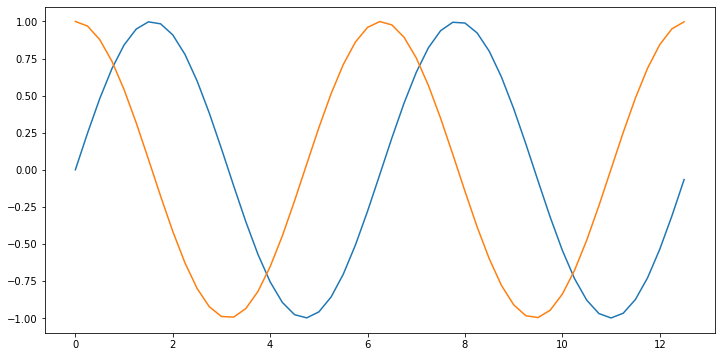

In [134]:
# figure proportions (sizes)
plt.figure(figsize=(12,6))

plt.plot(x, y)
_=plt.plot(x, z) # skips the plot object representaion printing

 ## $$ \textbf{Markers, Labels and Title}$$
<hr> 
<br>

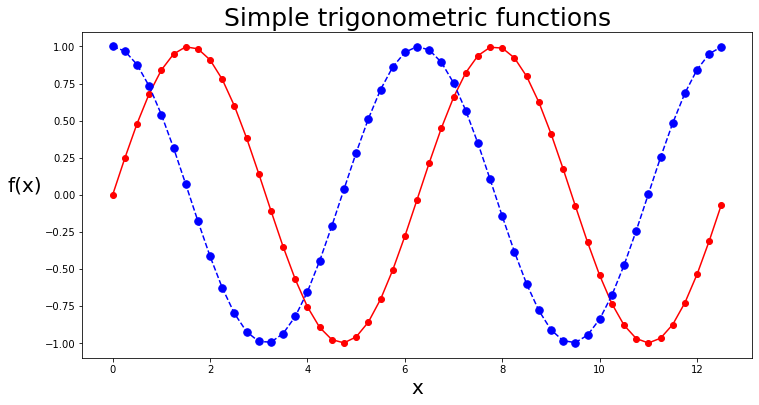

In [135]:
plt.figure(figsize=(12,6))

# connected circles marker style
plt.plot(x, y, 'o-', color='red') # marker shortcut (o-) connected circles + color

# connected stars 
plt.plot(x, z, 'b.--', ms=15)  # (*--) stars with dashed line connection + size of the markers

plt.xlabel('x', fontsize=20) # x-axis label + fontsize
plt.ylabel('f(x)', fontsize=20, rotation=0, labelpad=20) # y-axis label + rotation angle (default 90 degree)

_=plt.title('Simple trigonometric functions', fontsize=25) # skip printing the plot object representation

 ## $$ \textbf{Legend, Ticks and Grids}$$
<hr> 
<br>

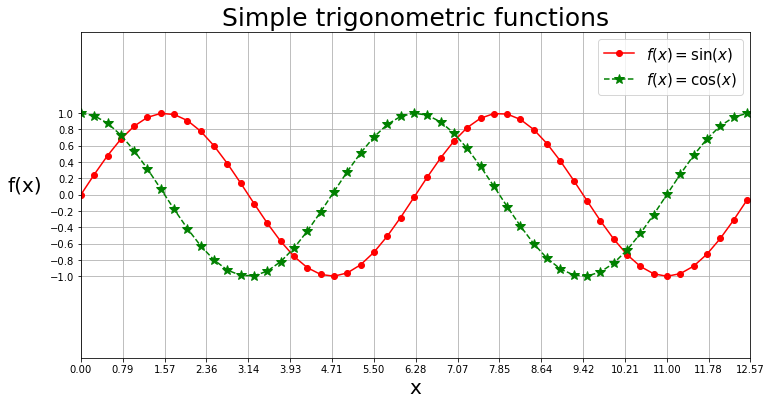

In [136]:
# figure proportions (sizes)
plt.figure(figsize=(12,6))

# connected circles marker style
plt.plot(x, y, 'o-', color='red', label='$f(x) = \sin(x)$') # LaTex expressions for the line labeling

# connected stars 
plt.plot(x, z, '*--', color='green', label='$f(x) = \cos(x)$', ms=10) 

plt.ylim(-2,2) # sets axis limits
plt.xlim(0, 4*np.pi)

plt.legend(loc='upper right', fontsize=15) # trigger the legend creation with the specified location + fontsize

plt.xlabel('x', fontsize=20) # fontsize
plt.ylabel('f(x)', fontsize=20, rotation=0, labelpad=25) # lable rotation angle (default 90 degree)

plt.yticks(np.arange(-1, 1.01, .2 ) ) # from -1 to 1 every 0.2 is a tick
plt.xticks(np.arange(0, 4*np.pi+0.01, np.pi/4)) # from 0 to 4 pi every pi/4 is a tick

plt.title('Simple trigonometric functions', fontsize=25)

plt.grid(True) # grid lines

 ## $$ \textbf{Performance curves for matrix multiplication}$$
<hr> 
<br>

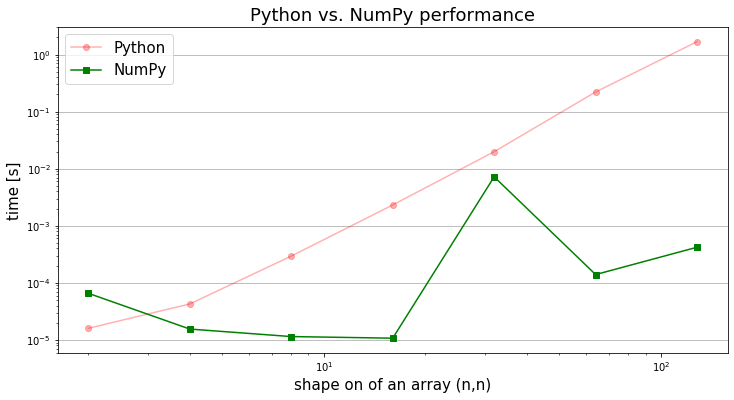

In [248]:
plt.figure(figsize=(12,6))
plt.plot(sizes, py_t, 'o-', label='Python', color='red', alpha=0.3) # alpha for the transparency value
plt.plot(sizes, np_t, 's-', label='NumPy', color='green')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('shape on of an array (n,n)', fontsize=15)
plt.ylabel('time [s]', fontsize=15)
plt.title('Python vs. NumPy performance', fontsize=18)
plt.grid(axis='y') # grid with along an y axis
_=plt.legend(loc=2, fontsize=15) # location within hhe second quadrant

# $$ \textbf{Computations on GPU with}$$
<hr> 
<br>

<center>
    <img src='./images/torch.png' width='800'>

In [249]:
# conda install pytorch torchvision cudatoolkit=10.2 -c pytorch

import numpy as np
import torch as tr

device = 'cuda:0' if tr.cuda.is_available() else 'cpu'
device

'cuda:0'

# $$ \textbf{Benchmark function on PyTorch}$$
<hr> 
<br>

In [250]:
from time import time

def benchmark_gpu(n, device):
    
    # Tensor object initialization
    X = tr.ones((n, n)).float().to(device) # creates a float tensor of ones + shifts it to GPU
    Y = tr.ones((n, n)).float().to(device) 
    
    # actual (measured) matrix multiplication
    start = time()
    Z = tr.mm(X,Y) # dot product in PyTorch
    end = time()
    
    return end-start

In [251]:
size = 256
benchmark_gpu(size, device)

0.00014972686767578125

In [252]:
max_power = 12
sizes =  2 ** np.arange(1, max_power+1)
sizes

array([   2,    4,    8,   16,   32,   64,  128,  256,  512, 1024, 2048,
       4096])

In [253]:
# collect the elapsed computational times on CPU and GPU
np_t = [benchmark_np(size) for size in sizes]
gpu_t = [benchmark_gpu(size, device) for size in sizes]

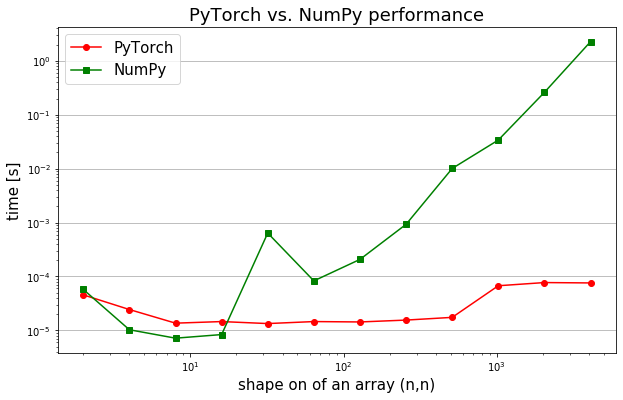

In [254]:
plt.figure(figsize=(10,6))
plt.plot(sizes, gpu_t, 'o-', label='PyTorch', color='red')
plt.plot(sizes, np_t, 's-', label='NumPy', color='green')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('shape on of an array (n,n)', fontsize=15)
plt.ylabel('time [s]', fontsize=15)

plt.title('PyTorch vs. NumPy performance', fontsize=18)

plt.grid(axis='y') # grid with along an y axis
_=plt.legend(loc=2, fontsize=15) # location within hhe second quadrant

# $$ \textbf{Thank you for your attention.}$$